In [1]:
torch.setdefaulttensortype('torch.FloatTensor')
function rotatePoint(radian, point, origin)
    local rx = math.cos(radian) * (point[1] - origin[1]) - math.sin(radian) * (point[2] - origin[2]) + origin[1]
    local ry = math.sin(radian) * (point[1] - origin[1]) + math.cos(radian) * (point[2] - origin[2]) + origin[2]
    return rx, ry
end

In [21]:
function randomTranslation(img, crop_boundary, variation)
    local x = crop_boundary[1] + (torch.uniform(0, variation) - variation / 2)
    local y = crop_boundary[2] + (torch.uniform(0, variation) - variation / 2)
    local width = crop_boundary[3]
    local height = crop_boundary[4]
    
    return image.crop(img, x, y, x + width, y + height)
end

function randomScale(img, crop_boundary, variation)
    local v = torch.uniform(0, variation) - variation / 2
    local x = crop_boundary[1] + v
    local y = crop_boundary[2] + v
    local width = crop_boundary[3] - 2 * v
    local height = crop_boundary[4] - 2 * v
    
    return image.crop(img, x, y, x + width, y + height)
end

In [22]:
d = 200
img = image.load('boer.jpeg')
img = image.scale(img, d, d)

p1 = torch.Tensor(2); p1[1] = 50; p1[2] = 60;
p2 = torch.Tensor(2); p2[1] = 70; p2[2] = 80;
crop_boundary = {50, 60, 20, 20}

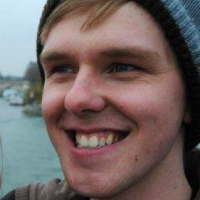

In [23]:
itorch.image(img)

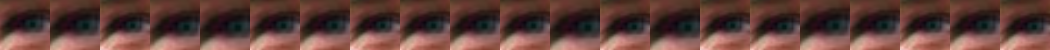

In [29]:
combo = image.scale(randomScale(img, crop_boundary, 0), 50, 50)
for i = 1, 20 do
    translation = image.scale(randomScale(img, crop_boundary, 4), 50, 50)
    combo = combo:cat(translation)
end
itorch.image(combo)